# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

**Important Note:** This notebook was primarily AI-generated and has not been fully verified by human experts. Please exercise caution when interpreting the code, results, or any conclusions drawn from this notebook. Independent verification is recommended.

## Overview of the Dandiset

This notebook explores Dandiset [001433](https://dandiarchive.org/dandiset/001433/0.250507.2356) version 0.250507.2356, titled "Breathing rhythm and place dataset".

According to the metadata, this Dandiset contains:
> "These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task."

The data includes measurements such as `ProcessingModule`, `ElectricalSeries`, and `ElectrodeGroup`, utilizing techniques like "multi electrode extracellular electrophysiology recording technique".

## Notebook Goals

This notebook will demonstrate how to:
1. Connect to the DANDI archive and access metadata for the Dandiset.
2. List assets within the Dandiset.
3. Load a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Inspect basic metadata and contents of the NWB file.
5. Load and visualize example electrophysiology (LFP) and behavioral (sniff) data.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for working with NWB files)
- `h5py` (a dependency for NWB/HDF5 files)
- `remfile` (for streaming remote HDF5 files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `pandas` (for tabular data, e.g., electrode tables)
- `seaborn` (for enhanced plot styling)

This notebook assumes these packages are already present in your Python environment.

## 1. Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001433"
dandiset_version = "0.250507.2356" # Specify the version used for this notebook
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
print("\nFirst 5 assets in the Dandiset:")
for asset_count, asset in enumerate(islice(dandiset.get_assets(), 5)):
    print(f"- Path: {asset.path}, Size: {asset.size} bytes, ID: {asset.identifier}")
    if asset_count == 0: # Store the first asset details for later use
        first_asset_path = asset.path
        first_asset_id = asset.identifier

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Dandiset description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903

First 5 assets in the Dandiset:
- Path: sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb, Size: 268333936 bytes, ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2
- Path: sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb, Size: 329841200 bytes, ID: cce2f86c-2440-4358-8298-75cb2faa83f1
- Path: sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb, Size: 408343856 bytes, ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe
- Path: sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb, Size: 492455472 bytes, ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb
- Path: sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb, Size: 1056553584 bytes, ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49


## 2. Loading an NWB File from the Dandiset

We will now load one of the NWB files from the Dandiset. For this demonstration, we'll use the first NWB file encountered:
`sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb` (Asset ID: `63d19f03-2a35-48bd-a54f-9ab98ceb7be2`).

The URL to download/stream this asset is constructed using its asset ID:
`https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/`

We will use `pynwb`, `h5py`, and `remfile` to stream and read the NWB file directly from the DANDI archive.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd # For displaying electrode table

# URL for the specific NWB file we are analyzing (hardcoded as per task instructions from nwb-file-info)
nwb_file_url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
# Asset ID for Neurosift link construction
nwb_asset_id = "63d19f03-2a35-48bd-a54f-9ab98ceb7be2" 

print(f"Loading NWB file from URL: {nwb_file_url}")

try:
    remote_nwb_file = remfile.File(nwb_file_url)
    h5_nwb_file = h5py.File(remote_nwb_file, 'r') # Open in read-only mode
    io = pynwb.NWBHDF5IO(file=h5_nwb_file, mode='r', load_namespaces=True)
    nwbfile = io.read()
    print("\nNWB file loaded successfully.")
    print(f"Identifier: {nwbfile.identifier}")
    print(f"Session description: {nwbfile.session_description}")
    print(f"Session start time: {nwbfile.session_start_time}")
    print(f"Experimenter(s): {nwbfile.experimenter}")
    print(f"Lab: {nwbfile.lab}")
    print(f"Institution: {nwbfile.institution}")
    
    if nwbfile.subject:
        print(f"\nSubject ID: {nwbfile.subject.subject_id}")
        print(f"Subject species: {nwbfile.subject.species}")
        print(f"Subject sex: {nwbfile.subject.sex}")
        print(f"Subject age: {nwbfile.subject.age}")

except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwbfile = None # Ensure nwbfile is None if loading fails

Loading NWB file from URL: https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/



NWB file loaded successfully.
Identifier: 4122_4
Session description: LFP and sniff recording
Session start time: 2025-05-07 15:29:27.359523-07:00
Experimenter(s): ('Rafilson, Sidney',)
Lab: Smear lab
Institution: University of Oregon

Subject ID: 4122
Subject species: Mus musculus
Subject sex: M
Subject age: P90D


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Exploring the NWB File with Neurosift

You can explore this NWB file interactively using Neurosift. Follow this link:
[Neurosift: sub-4122_ses-20250507T152927_ecephys.nwb](https://neurosift.app/nwb?url={nwb_file_url}&dandisetId={dandiset_id}&dandisetVersion={dandiset_version})

(Note: Replace `{{dandiset_id}}` and `{{dandiset_version}}` if you are adapting this for a different Dandiset or version. For this specific case they correspond to 001433 and 0.250507.2356.)
The link above should be: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356)

### NWB File Contents Overview

Let's look at some of the available data within the loaded NWB file.

In [3]:
if nwbfile:
    print("Available acquisition objects:")
    for acq_name, acq_obj in nwbfile.acquisition.items():
        print(f"- {acq_name} (type: {type(acq_obj).__name__})")
        if hasattr(acq_obj, 'data'):
             print(f"  Data shape: {acq_obj.data.shape}, Data dtype: {acq_obj.data.dtype}")
        if hasattr(acq_obj, 'rate'):
            print(f"  Sampling rate: {acq_obj.rate} Hz")

    print("\nAvailable processing modules:")
    for proc_name, proc_module in nwbfile.processing.items():
        print(f"- {proc_name}")
        for interface_name, data_interface in proc_module.data_interfaces.items():
            print(f"  - {interface_name} (type: {type(data_interface).__name__})")
            if hasattr(data_interface, 'data'):
                 print(f"    Data shape: {data_interface.data.shape}, Data dtype: {data_interface.data.dtype}")
            if hasattr(data_interface, 'timestamps') and data_interface.timestamps is not None:
                 print(f"    Timestamps shape: {data_interface.timestamps.shape}")


    print("\nElectrodes Table:")
    if nwbfile.electrodes is not None:
        electrodes_df = nwbfile.electrodes.to_dataframe()
        # Displaying with pandas options for better readability in some environments
        with pd.option_context('display.max_rows', 10, 'display.max_columns', None, 'display.width', 1000):
            print(electrodes_df.head())
    else:
        print("No electrodes table found.")
else:
    print("NWB file not loaded, cannot display contents.")

Available acquisition objects:
- LFP (type: ElectricalSeries)
  Data shape: (1969184, 16), Data dtype: float64
  Sampling rate: 1000.0 Hz
- SniffSignal (type: TimeSeries)
  Data shape: (1969184,), Data dtype: float64
  Sampling rate: 1000.0 Hz

Available processing modules:
- behavior
  - exhalation_time (type: TimeSeries)
    Data shape: (10030,), Data dtype: int64
    Timestamps shape: (10030,)
  - inhalation_time (type: TimeSeries)
    Data shape: (10030,), Data dtype: int64
    Timestamps shape: (10030,)

Electrodes Table:
          location                                              group group_name filtering
id                                                                                        
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x130...   LFPGroup      none
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x130...   LFPGroup      none
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x130...   LFPGroup      none
3   olfactor

## 3. Visualizing LFP and Sniff Data

We'll now plot a short segment of the Local Field Potential (LFP) data from the first available channel and the corresponding raw sniff signal. This helps to get a basic feel for the recorded signals.

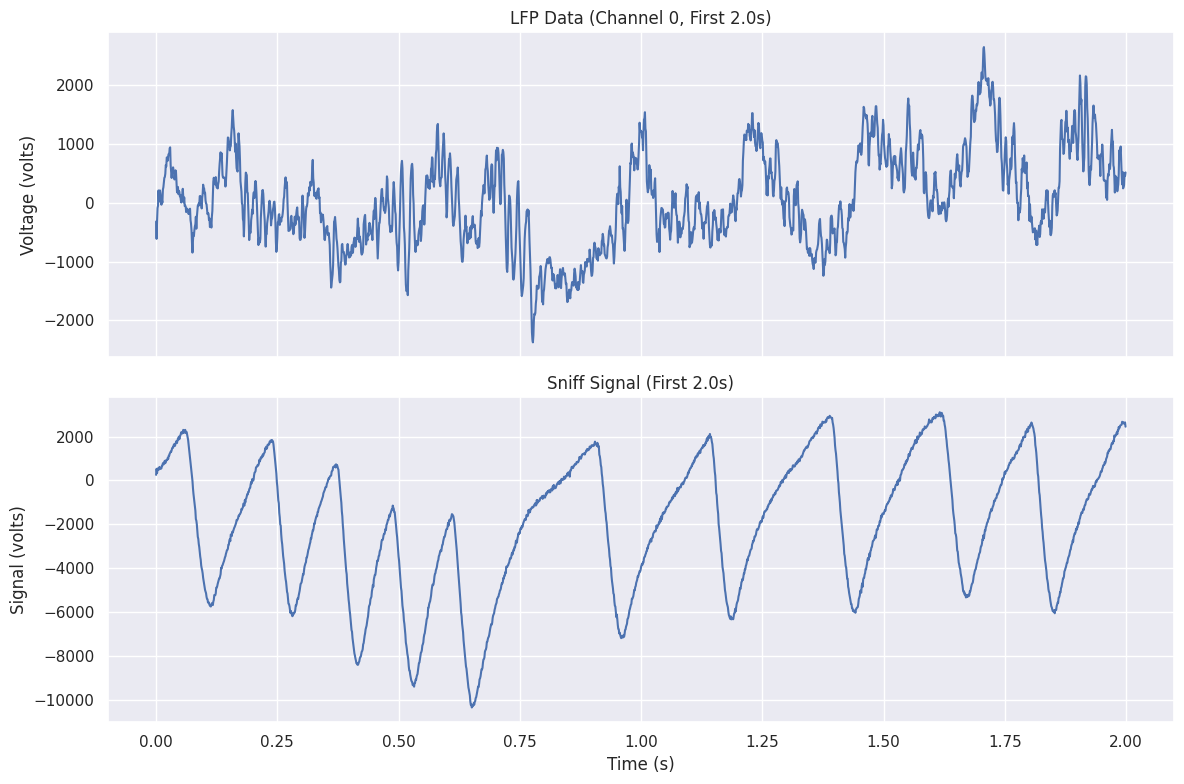

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn styling for plots
sns.set_theme()

if nwbfile and "LFP" in nwbfile.acquisition and "SniffSignal" in nwbfile.acquisition:
    LFP = nwbfile.acquisition["LFP"]
    SniffSignal = nwbfile.acquisition["SniffSignal"]

    # Define segment to plot (e.g., first 2 seconds)
    duration_seconds = 2.0
    
    # LFP Data
    sampling_rate_lfp = LFP.rate
    num_samples_lfp = int(sampling_rate_lfp * duration_seconds)
    # Load data for the first channel of LFP
    # Ensure we don't request more samples than available
    lfp_data_segment = LFP.data[:min(num_samples_lfp, LFP.data.shape[0]), 0]
    time_lfp = np.arange(len(lfp_data_segment)) / sampling_rate_lfp

    # Sniff Signal Data
    sampling_rate_sniff = SniffSignal.rate # Assuming SniffSignal also has a rate attribute
    num_samples_sniff = int(sampling_rate_sniff * duration_seconds)
    # Ensure we don't request more samples than available
    sniff_data_segment = SniffSignal.data[:min(num_samples_sniff, SniffSignal.data.shape[0])]
    time_sniff = np.arange(len(sniff_data_segment)) / sampling_rate_sniff
    
    # Create plot
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot LFP data
    axs[0].plot(time_lfp, lfp_data_segment)
    axs[0].set_title(f'LFP Data (Channel 0, First {duration_seconds}s)')
    axs[0].set_ylabel(f'Voltage ({LFP.unit})')

    # Plot SniffSignal data
    axs[1].plot(time_sniff, sniff_data_segment)
    axs[1].set_title(f'Sniff Signal (First {duration_seconds}s)')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel(f'Signal ({SniffSignal.unit})')

    plt.tight_layout()
    plt.show()

elif nwbfile:
    print("LFP or SniffSignal data not found in the NWB file's acquisition group.")
else:
    print("NWB file not loaded, cannot visualize data.")

### Behavioral Data: Inhalation and Exhalation Times

The NWB file contains a `behavior` processing module with `TimeSeries` objects named `inhalation_time` and `exhalation_time`. These likely relate to detected phases of the sniff cycle.

For example, one could access them like this:
```python
if nwbfile and "behavior" in nwbfile.processing:
    behavior_module = nwbfile.processing["behavior"]
    if "inhalation_time" in behavior_module.data_interfaces:
        inhalation_ts = behavior_module.data_interfaces["inhalation_time"]
        # inhalation_ts.data and inhalation_ts.timestamps can be accessed here
        print(f"Inhalation TimeSeries found: data shape {inhalation_ts.data.shape}, timestamps shape {inhalation_ts.timestamps.shape}")
    if "exhalation_time" in behavior_module.data_interfaces:
        exhalation_ts = behavior_module.data_interfaces["exhalation_time"]
        # exhalation_ts.data and exhalation_ts.timestamps can be accessed here
        print(f"Exhalation TimeSeries found: data shape {exhalation_ts.data.shape}, timestamps shape {exhalation_ts.timestamps.shape}")
```
While these series are available, directly deriving and plotting intuitive sniff cycle phase *durations* (e.g., duration of each inhalation) from their `data` or `timestamps` attributes was not straightforward based on the initial metadata exploration for this introductory notebook. The `data` attribute for both series appeared to contain uniform integer values, and calculating differences from `timestamps` yielded values with a very large range that did not fit typical sniff cycle durations without further unit conversion or clarification not readily available from the top-level metadata.

Further investigation into the precise meaning and units of these specific `TimeSeries` objects would be needed for robust analysis of sniff phase durations.

## 4. Summary and Future Directions

This notebook demonstrated the initial steps to access and explore Dandiset 001433. We covered:
- Connecting to the DANDI archive.
- Retrieving Dandiset metadata and listing assets.
- Loading a specific NWB file by streaming its content.
- Inspecting high-level metadata and data structures within the NWB file.
- Visualizing a short segment of LFP and raw sniff sensor data.

### Possible Future Directions:
- **Detailed LFP Analysis:** Perform spectral analysis (e.g., power spectral density, spectrograms) on LFP channels to investigate oscillatory activity related to breathing or behavior.
- **Sniff Signal Processing:** Apply filtering and feature extraction to the raw sniff signal to robustly detect inhalation/exhalation phases, calculate breath frequency, amplitude, etc. This would clarify the interpretation of the `inhalation_time` and `exhalation_time` series.
- **Correlating Neural Activity with Behavior:** Investigate relationships between LFP features (e.g., power in specific frequency bands) and sniff parameters.
- **Cross-Session/Animal Analysis:** Extend the analysis to multiple NWB files within the Dandiset to compare findings across different recording sessions or animals, if applicable.
- **Exploring Other Data:** This Dandiset also mentions "video" data. Exploring how to access and correlate this with electrophysiology and sniffing would be another avenue.

---
End of Notebook. Remember to close the NWB file if you are managing resources manually in a script context, though it's typically handled by Python's garbage collection or context managers when appropriate.

```python
# if 'io' in locals() and io is not None:
# try:
# io.close()
# print("NWB file IO closed.")
# except Exception as e:
# print(f"Error closing NWB file IO: {e}")
```
The `io.close()` command is commented out as it may cause issues if the file or remote connection is already closed or if `io` is not defined due to an earlier error. In a Jupyter notebook context, explicit closing is often less critical than in standalone scripts where resource leaks can be more problematic over long runs or many iterations.
For this notebook, the internal `h5py.File` object associated with `remfile.File` should be closed.

In [5]:
# Attempt to close the HDF5 file object if it's open
if 'io' in locals() and io is not None:
    try:
        # The NWBHDF5IO object manages the h5py.File object passed to it.
        # Closing the NWBHDF5IO object should close the underlying h5py.File.
        io.close()
        print("NWB file IO resources released.")
    except Exception as e:
        # It might be already closed or in a state that cannot be closed.
        print(f"Note: Could not explicitly close NWB file IO, it might be already closed or managed elsewhere: {e}")
elif 'h5_nwb_file' in locals() and h5_nwb_file is not None:
    try:
        h5_nwb_file.close()
        print("HDF5 file object closed directly.")
    except Exception as e:
        print(f"Note: Could not explicitly close HDF5 file object: {e}")

if 'remote_nwb_file' in locals() and remote_nwb_file is not None:
    try:
        remote_nwb_file.close() # remfile.File also has a close method
        print("Remote file object closed.")
    except Exception as e:
         print(f"Note: Could not explicitly close remote file object: {e}")

NWB file IO resources released.
Remote file object closed.
